In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=15)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=12)

In [2]:
df = pd.read_csv('911 analysis/911.csv')

# Looking at data information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


# Data exploration

In [5]:
# Looking at top 5 zip codes for 911 calls

df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [6]:
# Looking at top 5 townships for 911 calls

df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Text(0, 0.5, 'Count')

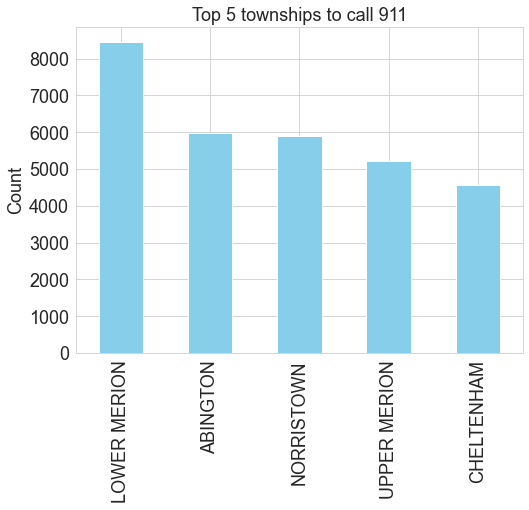

In [7]:
plt.figure(figsize=(8,6))
plt.title('Top 5 townships to call 911', fontsize=18)
df['twp'].value_counts().head(5).plot(kind='bar', color='skyblue', fontsize=18)
plt.ylabel('Count', fontsize=18)

In [8]:
# Looking at top 5 reasons for 911 calls

df['title'].value_counts().head(5)

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
Name: title, dtype: int64

Text(0, 0.5, 'Count')

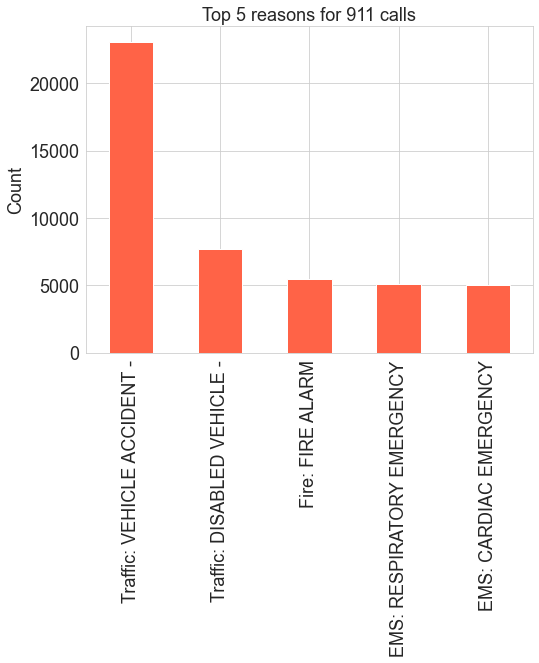

In [9]:
plt.figure(figsize=(8,6))
plt.title('Top 5 reasons for 911 calls', fontsize=18)
df['title'].value_counts().head(5).plot(kind='bar', color='tomato', fontsize=18)
plt.ylabel('Count', fontsize=18)

In [10]:
# Looking at the number of unique reasons for 911 calls

df['title'].nunique()

110

## Creating new features

In [11]:
# splitting title column to find reason category for 911 calls

df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [12]:
# Looking at the number of calls per category 

df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:title={'center':'Total calls per category'}, xlabel='Reason', ylabel='count'>

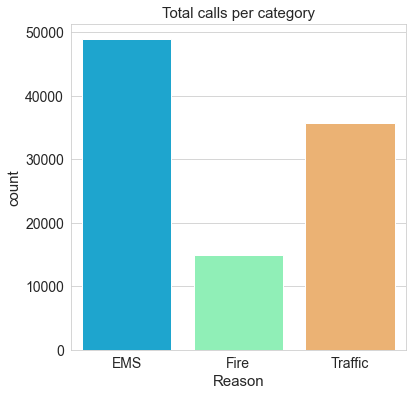

In [13]:
plt.figure(figsize=(6,6))


plt.title('Total calls per category', fontsize=15)
sns.countplot(x='Reason',data=df,palette='rainbow',)


In [14]:
# Converting timestamp column entries from string into Pandas Datetime format

df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [15]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [16]:
# assigning labels to day numbers

daymap = {0:'Mon',
          1:'Tue',
          2:'Wed',
          3:'Thu',
          4:'Fri',
          5:'Sat',
          6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(daymap)

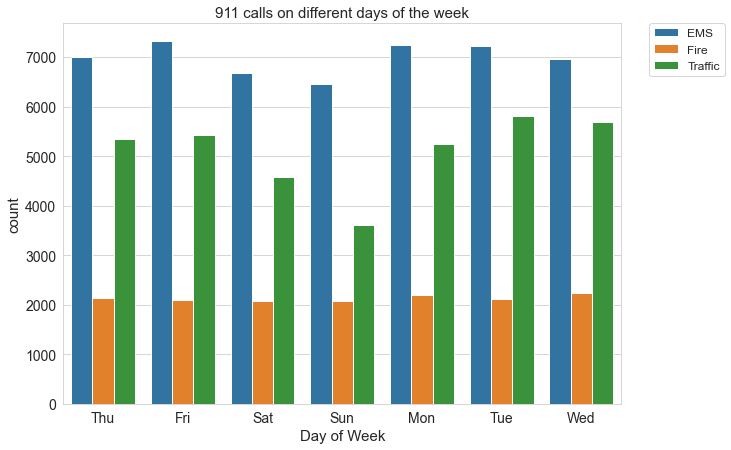

In [17]:
plt.figure(figsize=(10,7))
plt.title('911 calls on different days of the week', fontsize=15)

sns.countplot(x=df['Day of Week'],data=df, hue='Reason')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, )

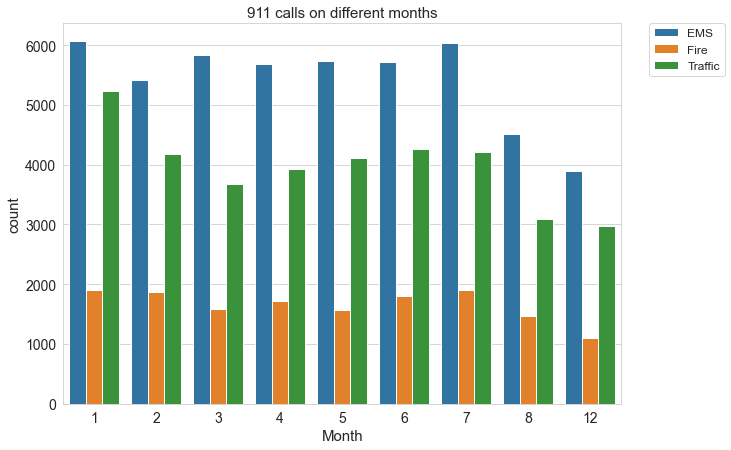

In [18]:
plt.figure(figsize=(10,7))
plt.title('911 calls on different months', fontsize=15)

sns.countplot(x=df['Month'],data=df, hue='Reason')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, )

# Looks like data for months Sept, Oct, Nov are not available

In [21]:
# Grouping data by month to see call trend

df_bymonth = df.groupby('Month').count()
df_bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


Text(5.425000000000004, 0.5, 'Call count')

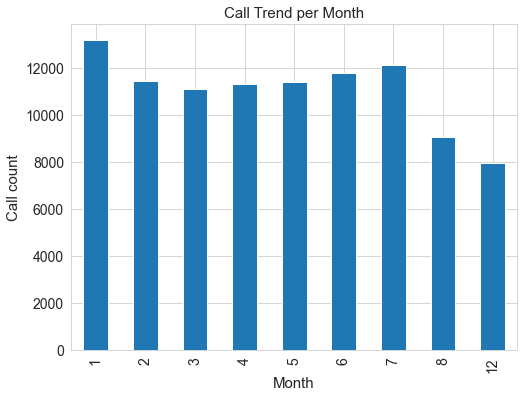

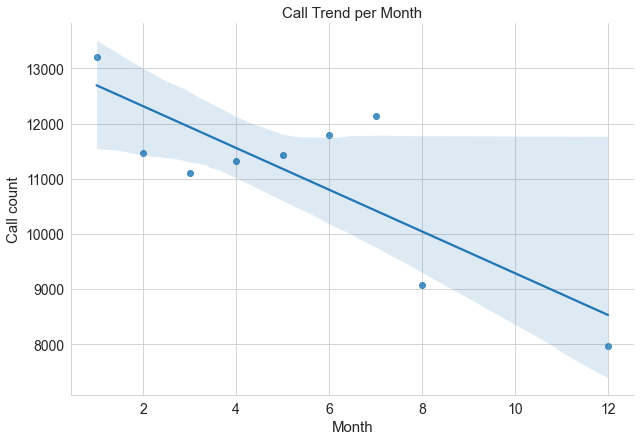

In [75]:
plt.figure(figsize=(8,6))
df_bymonth['title'].plot(kind='bar')
plt.ylabel('Call count')
plt.title('Call Trend per Month')

sns.lmplot(x='Month', y='title', data=df_bymonth.reset_index(), height=6, aspect=1.5)
plt.title('Call Trend per Month')
plt.ylabel('Call count')

In [76]:
df['Date'] = df['timeStamp'].apply(lambda x:x.date())

Text(0, 0.5, 'Call count')

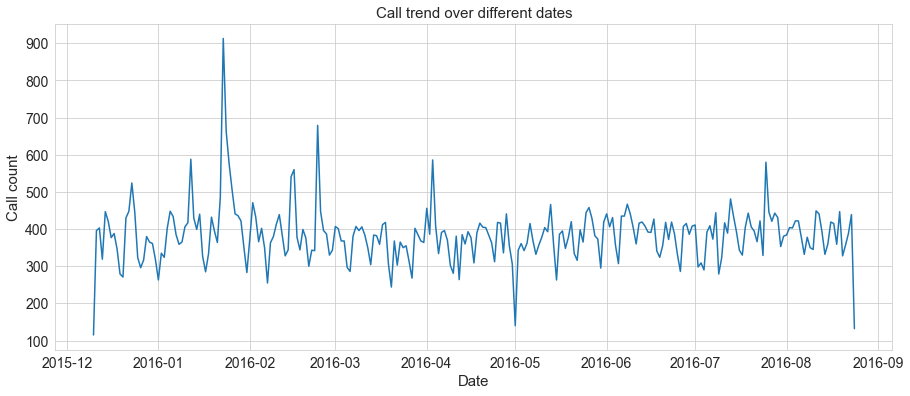

In [77]:
plt.figure(figsize=(15,6))
df.groupby('Date').count()['title'].plot()
plt.title('Call trend over different dates')
plt.ylabel('Call count')

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

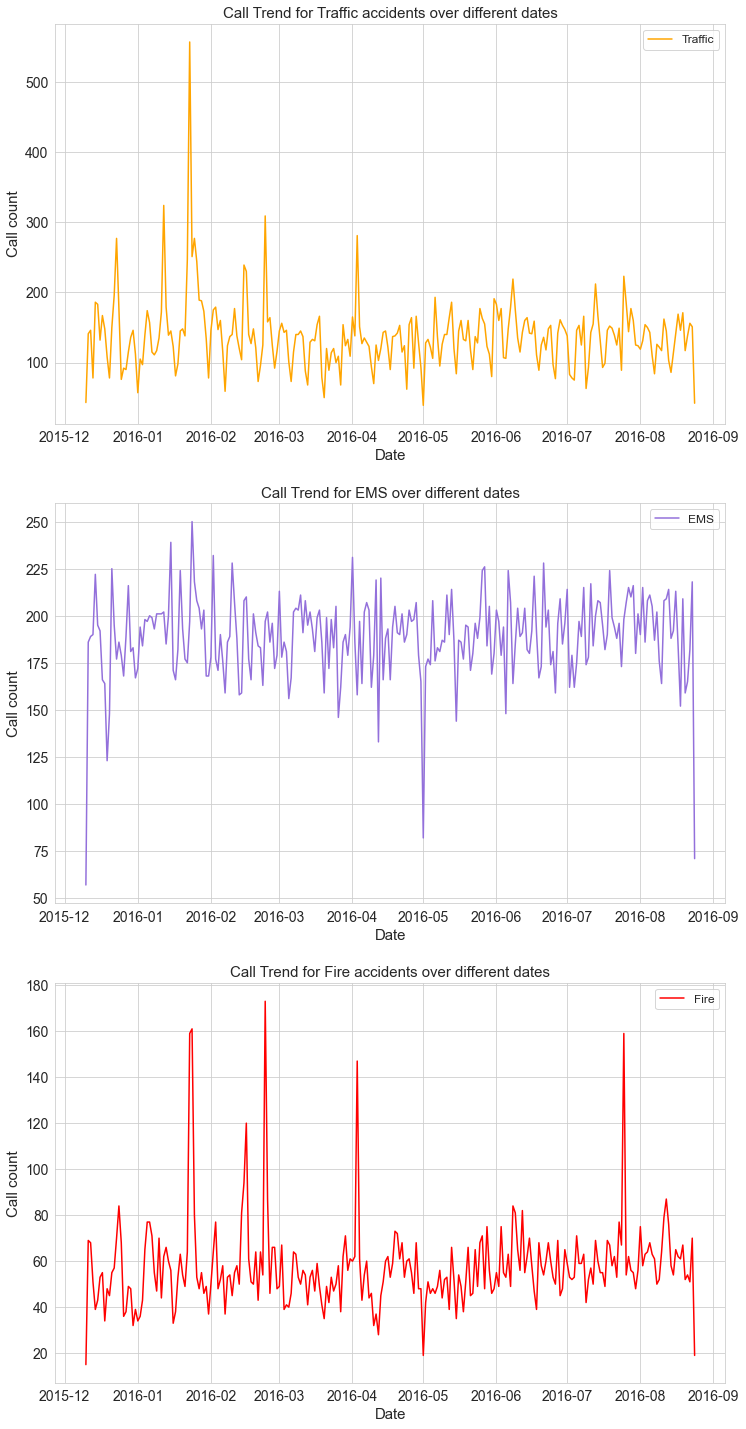

In [106]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(12,25))

df[df['Reason']=='Traffic'].groupby('Date').count()['title'].plot(color='orange', ax=ax1, label='Traffic')
ax1.set_title('Call Trend for Traffic accidents over different dates')
ax1.set_ylabel('Call count')
ax1.legend()

df[df['Reason']=='EMS'].groupby('Date').count()['title'].plot(color='mediumpurple', ax=ax2, label='EMS')
ax2.set_title('Call Trend for EMS over different dates')
ax2.set_ylabel('Call count')
ax2.legend()

df[df['Reason']=='Fire'].groupby('Date').count()['title'].plot(color='red', ax=ax3, label='Fire')
ax3.set_title('Call Trend for Fire accidents over different dates')
ax3.set_ylabel('Call count')
ax3.legend()


In [90]:
# grouping data by day of the week and month to observe call trend 

day_month = df.groupby(['Day of Week','Month']).count()['Reason'].unstack()
day_month.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


Text(0.5, 1.0, 'Day vs. Month trend for 911 calls')

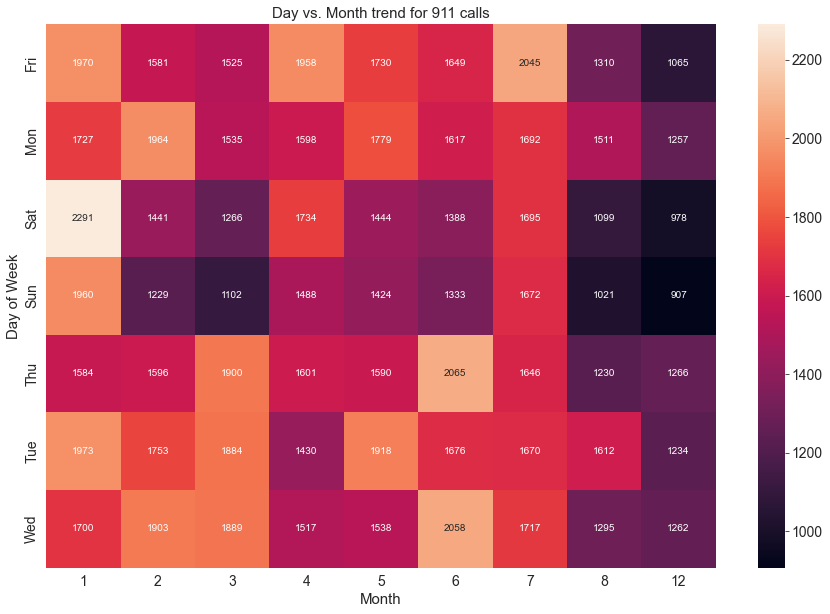

In [103]:
plt.figure(figsize=(15,10))
sns.heatmap(day_month, cmap='rocket', annot=True, fmt='d')
plt.title('Day vs. Month trend for 911 calls')

# It looks like Saturdays in January, Wednesdays and Thursdays in June, and Fridays in July have a relatively high number of calls to 911